In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load experiment
dataset = "mammography"

experiment_path_standard = "experiments/results/mamm01-standard" 
experiment_path_evo_all = "experiments/results/mamm01" 
# experiment_path_evo_partial = "./data/evo/evolve_partial_architecture/" + dataset


<Axes: xlabel='crossover_rate', ylabel='Test_Acc.'>

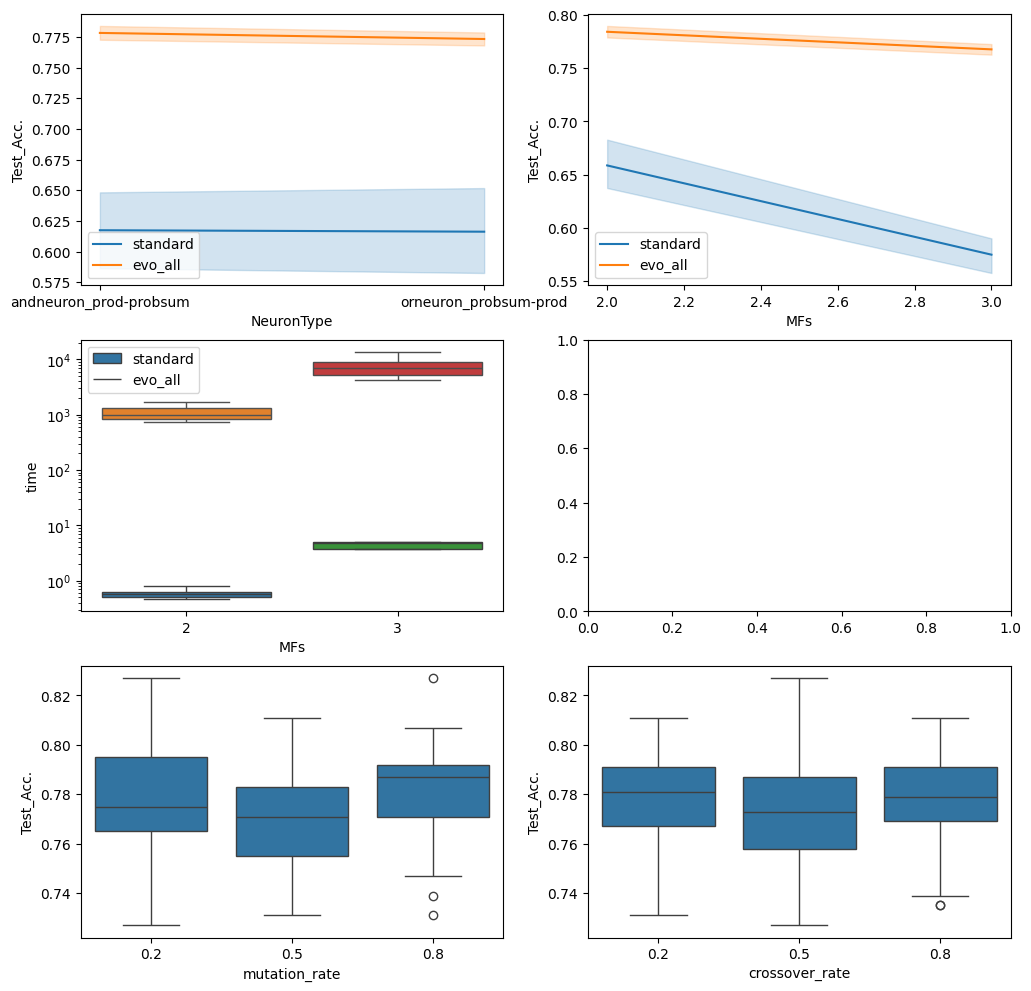

In [10]:
#load the data

global_results_standard = pd.read_csv(experiment_path_standard + "/glob.csv")
global_results_evo_all = pd.read_csv(experiment_path_evo_all + "/global_result_0.csv")
# global_results_evo_partial = pd.read_csv(experiment_path_evo_partial + "/global_result.csv")


#plot the results
figure1, axs = plt.subplots(3, 2, figsize=(12, 12))
sns.lineplot(data=global_results_standard, x="NeuronType", y="Test_Acc.", label="standard", ax=axs[0,0])
sns.lineplot(data=global_results_evo_all, x="NeuronType", y="Test_Acc.", label="evo_all", ax=axs[0,0])

sns.lineplot(data=global_results_standard, x="MFs", y="Test_Acc.", label="standard", ax=axs[0,1], markers="o")
sns.lineplot(data=global_results_evo_all, x="MFs", y="Test_Acc.", label="evo_all", ax=axs[0,1], markers="o")
# sns.lineplot(data=global_results_evo_partial, x="MFs", y="Test_Acc.", label="evo_partial", ax=axs[0,1], markers="o")


sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==2], x="MFs", y="time", ax=axs[1,0])
sns.boxplot(data=global_results_evo_all[global_results_evo_all["MFs"]==2], x="MFs", y="time",  ax=axs[1,0])
axs[1,0].legend(["standard", "evo_all"])
axs[1,0].set_yscale("log")

sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==3], x="MFs", y="time", ax=axs[1,0])
sns.boxplot(data=global_results_evo_all[global_results_evo_all["MFs"]==3], x="MFs", y="time",  ax=axs[1,0])
axs[1,0].legend(["standard", "evo_all"])
axs[1,0].set_yscale("log")

# sns.boxplot(data=global_results_evo_partial, x="update_gene", y="Test_Acc.", ax=axs[1,1])


sns.boxplot(data=global_results_evo_all, x="mutation_rate", y="Test_Acc.", ax=axs[2,0])



sns.boxplot(data=global_results_evo_all, x="crossover_rate", y="Test_Acc.", ax=axs[2,1])
